# load my fine-tuned model

### I Fine Tuned and pushed model to huggingface , [model repo link](https://huggingface.co/abhishekvidhate/Abhishek-PaliGemma-FT)

In [1]:
!pip install transformers
!pip install huggingface_hub
!pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 9.8 MB/s eta 0:00:00


In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

model_id = "abhishekvidhate/Abhishek-PaliGemma-FT"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)
processor = AutoProcessor.from_pretrained("google/paligemma-3b-pt-224")

2024-07-06 14:30:28.224792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 14:30:28.224886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 14:30:28.348943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/669 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/5.73M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

In [4]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import os

def load_image(image_path_or_url):
    if os.path.exists(image_path_or_url):
        # Case 1: Local Image File
        return Image.open(image_path_or_url)
    elif image_path_or_url.startswith('http'):
        # Case 2: Image URL
        response = requests.get(image_path_or_url)
        image_data = response.content
        return Image.open(BytesIO(image_data))
    else:
        raise ValueError("Unsupported image input. Please provide a valid local file path or image URL.")


# provide URL of Physics Questions and test if my FineTuned Paligemma is able to solve or not

### Physics Kinematics Question-Answer dataset which I built [link](https://huggingface.co/datasets/abhishekvidhate/PhysicsKinematisQA)

# Q 1

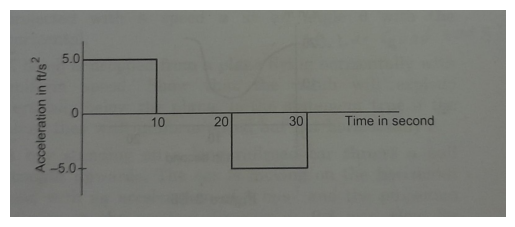


0


In [7]:
image_path_or_url = "https://datasets-server.huggingface.co/assets/abhishekvidhate/PhysicsKinematisQA/--/06d7adbbf749be012e0e188ef7a44f7392bc6d18/--/default/train/0/image/image.jpg?Expires=1720279297&Signature=mgWe7kdsFZYWnaa2GB8YCCPh8RT68Q379kzbP7sWBvKXbh-OkzQp-6vsHi0bvADIqkRe~Llj-BaU8xtBCFYCGYc-hgD2Yl8B0LgY9ZZJCkR5RQ9IhqLNK4-wVIn0POTLEkYPlQzW9VF2GHpJveX4FjKpVLo4~RfsK7hDJTUbY5M4BfX7UfxjLiMi5a1ytackyyAALI-IwxKvFUrEZ2TXUiCVfjTpTsbz8RMIxuetGuxLH-bdJ9LtJaeTD~UGxbxDtSsYVGG2YoYCK3mga3QxZlyY4z8HkgmYJIXQxGLgXPLkrpAGOtFLp209Zhvrj67Xl50Sq1xaioRT--Z2nv3P3Q__&Key-Pair-Id=K3EI6M078Z3AC3"
raw_image = load_image(image_path_or_url)
prompt = "figure shows the graph of velocity versus time for a particle going along the X-axis. find the distance travelled in 0 to 10s?"
raw_image = load_image(image_path_or_url)
plt.imshow(raw_image)
plt.axis('off')  # Turn off axis labels
plt.show()

inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])

# Q 2

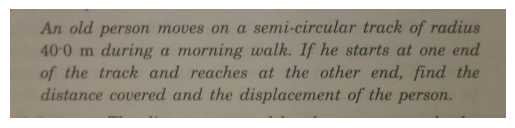


an old person moves on a semi-circular track of radius 40.0 m during a


In [8]:
image_path_or_url = "https://datasets-server.huggingface.co/assets/abhishekvidhate/PhysicsKinematisQA/--/06d7adbbf749be012e0e188ef7a44f7392bc6d18/--/default/train/1/image/image.jpg?Expires=1720279480&Signature=stuNKL45vNJeaPbQY2Wd63Yadi4OeFhk2f35uHGYq9X5EpQQPtCSNhU8midxLfOb0P~v8AG1O2AgHKYUfLXcPFmw8oQCYrC1hS6n41ZhKgsOWQ0W2tIWR7H~-JesVycdC3jpscoYQq57dvpTbhJGaMvRdg8FEkG1F-hpLIZS9Md~ZnZ0fkXI7QPbw7OMNhPEWFa~Ym0TLhDNLtxPCDYmEwPTeK24AZ9-rbNo4dohvEbpNsoo9l8kk3Qb1AZyKeHxy7YY0xxpg6kOXo5SjSXKB3Iz00whnVE3VomlyzuyNrXTqUqF~0SGLJLOcvqRcTpycZvyC7mdoq4YtSjd3bbVYg__&Key-Pair-Id=K3EI6M078Z3AC3"
raw_image = load_image(image_path_or_url)
prompt = "An Old person moves on a semi-circular track of radius 40.0 m during a morning walk. If he starts at one end of the track and reaches at the other end, find the distance covered and the displacement of the person. the distance covered by the person equals the length of the track and the displacement is equal to the diameter of the semi-circular track joining the two ends?"
raw_image = load_image(image_path_or_url)
plt.imshow(raw_image)
plt.axis('off')  # Turn off axis labels
plt.show()

inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])

# Q 3

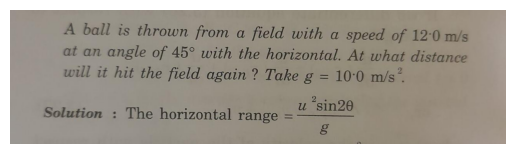


a ball is thrown from a field with a speed of 12.0 m/s at


In [9]:
image_path_or_url = "https://datasets-server.huggingface.co/assets/abhishekvidhate/PhysicsKinematisQA/--/06d7adbbf749be012e0e188ef7a44f7392bc6d18/--/default/train/2/image/image.jpg?Expires=1720279480&Signature=WxTyeKP8JqaBiTZIw-Gx1ioFEYdJwyz-NyihT1tj5TsW1qHMruk7dqOfPppMcRZp6TBf9FOFbojZspaBAppR9r~JQg49RTEYlNRDlTBNpJUaNxVMSdDxTzFeYTC6mJq00kOsmZ0ACgmxZ0bJPaiMjfSQLgnaU2YlnjZf5VFDkF1CwFYPpgpBNAXsVBB6pgl9M3xtKcNHbc9g58UqtC2AsIrmnbjBrK6bztL7IQhBMQLeEPSSBphYcOU3aZy9nF5mPMqbYbwR9BVNiBwxfVeTvtai96NlVseZ~yrA~j84-KI1E3Aa6f4FERxZtD9gcYtIR4ow~tihctwE5QGkQoNl4Q__&Key-Pair-Id=K3EI6M078Z3AC3"
raw_image = load_image(image_path_or_url)
prompt = "A ball is thrown from a field with a speed of 12m/s at an angle of 46 degrees with the horizontal. At what distance will it hit the field again. Use Horizontal range formula?"
raw_image = load_image(image_path_or_url)
plt.imshow(raw_image)
plt.axis('off')  # Turn off axis labels
plt.show()

inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])

# Q 4

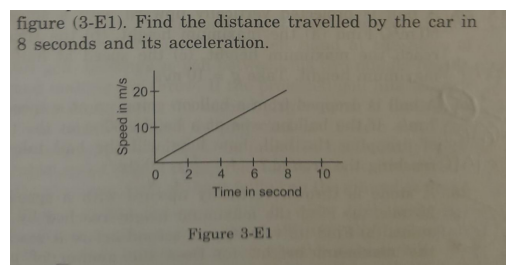


20 10 0 2 4 6 8 10 time in


In [10]:
image_path_or_url = "https://datasets-server.huggingface.co/assets/abhishekvidhate/PhysicsKinematisQA/--/06d7adbbf749be012e0e188ef7a44f7392bc6d18/--/default/train/3/image/image.jpg?Expires=1720279480&Signature=vw5iItenQBjdIMb6hSOPtPxmDGgaaA2xdPFZd7xM4RugJBFb-m8SN2e1YRNOS8MDvZBMFDmJe~mp5q8KrJqijdk9-tYK8hvPYeaYGe0HTu0owjxXb9QLmYPZrSi4kQ4LOdSrb~CaHHl~Aj2dN6ul-OAD01VhWyjbEysMDyI~ThFo3kQKNk1a6Vxgva~wuWh99qsCFV5pzLQ64u0Rep1oIKTCYJ47ubiYcBpBbq8tqd0AUSkAXB-gyAfErp3OIMG8cf~~tBJreoeeciD9CytFZCpGHvgjA4m5HsppijKG5cGdrVewGvHMjwLVNYCB7M2DynewKFGQrOI~-eTw8Q~6Xw__&Key-Pair-Id=K3EI6M078Z3AC3"
raw_image = load_image(image_path_or_url)
prompt = "The speed of a car as a function of time is shown in figure (3-E1), find the distance travelled by car in 8 seconds and its acceleration?"
raw_image = load_image(image_path_or_url)
plt.imshow(raw_image)
plt.axis('off')  # Turn off axis labels
plt.show()

inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])

# Q 5

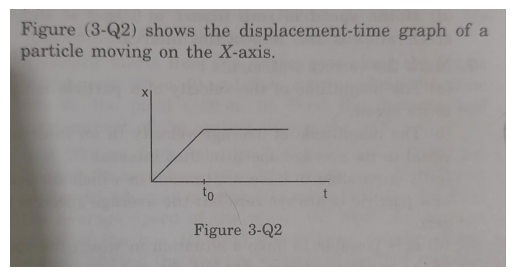


t


In [11]:
image_path_or_url = "https://datasets-server.huggingface.co/assets/abhishekvidhate/PhysicsKinematisQA/--/06d7adbbf749be012e0e188ef7a44f7392bc6d18/--/default/train/4/image/image.jpg?Expires=1720279480&Signature=GspaTSm758GmmE0cEROdPqYLpdg~vyMQMQF5znxuWoUEuIPGyoGIDoMYaaTAGTRCsPC6GHArzjohSfNk7vH65cPJXJ~r1cYTOWxTHqkpBSTwREZ8wuuwC80TkHjtSKVhkoIlNPQ1WQcfWSw~ESm4SWF28Mx3SLg~YukRHPpzZyLW0lOSvz1GpVSkFLGet79WjDxMS1lmA3XN2Lh0FHRqNcvz2ZhIWPoTBmz-2rXPK70cgZrzlFAXfnzbP0-IAyks5eap7Cz7VYjhjszvHy5YKaRWdUKy7pB06nIiUMGkAD-rprx9~QcBXkXmNfui4LuUPwlblWRKY0QnFbp1dqYOAg__&Key-Pair-Id=K3EI6M078Z3AC3"
raw_image = load_image(image_path_or_url)
prompt = "Figure (3-Q2) shows the displacement-time graph of a particle moving on X-axis, what is correct description of graph. Answer, the particle moves at constant velocity up to a time t0 and then stops?"
raw_image = load_image(image_path_or_url)
plt.imshow(raw_image)
plt.axis('off')  # Turn off axis labels
plt.show()

inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])

# Q 6

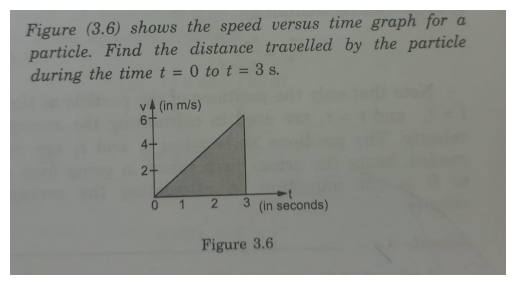


no


In [12]:
image_path_or_url = "https://datasets-server.huggingface.co/assets/abhishekvidhate/PhysicsKinematisQA/--/06d7adbbf749be012e0e188ef7a44f7392bc6d18/--/default/train/5/image/image.jpg?Expires=1720279480&Signature=HEzdMxUNLRM~0tfMzNV6FUz~8ObgbNoTNYZtqOWh54GSO-62EORnnhRVWgGu55m7A29YYYwNueS~1e~tqaC1paj2GqljhB8P5n3vAutAe50YOvwW~BfwqRq~PfxAmYWnvHTdpPUwuTqWPMVju4CEinVPrn4-w-weVPCNbmTGQnt9c6S5lwESi5hfnF-l88BL46F6txaRGfnFGZwCALgQNp3YboCj4APq03kcTQNZA7YF27ZNQwcA5xEQyF3QZmljnVNwL0-4CSpkW~c4Fq~u2QwsIcSUhcvgYcgwNPikJJWWz4PRIQ4t0HLJfzXWhWnBv0roeRDVOgj3dESndVquiQ__&Key-Pair-Id=K3EI6M078Z3AC3"
raw_image = load_image(image_path_or_url)
prompt = "Figure (3.6) shows the speed versus time graph for a particle. Find the distance travelled by the particle during the time t=0 to t=3 s. The distance travelled is equal to the area shaded in the figure?"
raw_image = load_image(image_path_or_url)
plt.imshow(raw_image)
plt.axis('off')  # Turn off axis labels
plt.show()

inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])

# Q 7

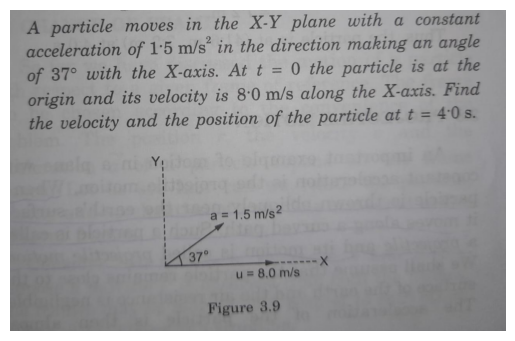


a particle moves in the xy plane with a constant acceleration of 1.5 m s² in


In [13]:
image_path_or_url = "https://datasets-server.huggingface.co/assets/abhishekvidhate/PhysicsKinematisQA/--/06d7adbbf749be012e0e188ef7a44f7392bc6d18/--/default/train/6/image/image.jpg?Expires=1720279480&Signature=qUqfeCibnB6Ydv6zzFEJd6wuvuUwsFQN4q~f7ZE9lcTfPHYJr6MFbGfZr5s8opQLewOqCg~XZAdvC4YC-QftNXugwMHb1lbKnFRJfr5~lWGH3WC8ZWXwkJCIhNmN-PfsjGhJvmgnWhNBkzJr54vsI~Ujyrvlxfhp-7qs0xmWkVOHuAZ2R3LB-rNWUw~3s3xlBitL7b-BWRCIJFg3jIH~jpXeIIqFt6m9J0GDt~HHcIi3Yczte7lITLOXWoIsf9rlIHXxtcv6LXatWZlEICbl6Cd0FDhynzWN2i5VHwzuFVgU4UhMAnifuiW~svEnCG9a-r9FHMJUN8OEvhwAFbF~HA__&Key-Pair-Id=K3EI6M078Z3AC3"
raw_image = load_image(image_path_or_url)
prompt = "A particle moves in X-Y plane with a constant acceleration of 1.5 metre per second square in the direction making an angle of 37 degree with X-axis. At t=0 the particle is at the origin and its velocity is 8 metre per second along the X-axis. Find the velocity and the position of the particle at t=4 seconds. Use Kinematics(Physics of motion of objects) to get answer?"
raw_image = load_image(image_path_or_url)
plt.imshow(raw_image)
plt.axis('off')  # Turn off axis labels
plt.show()

inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])

# Q 8

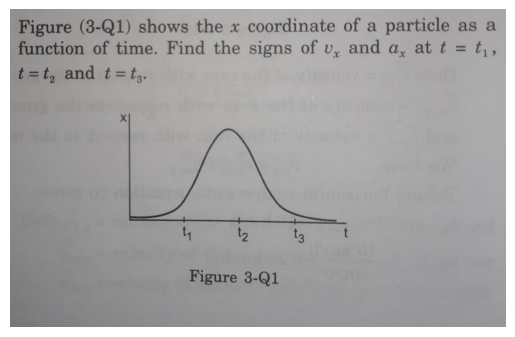


figure 3-Q1


In [14]:
image_path_or_url = "https://datasets-server.huggingface.co/assets/abhishekvidhate/PhysicsKinematisQA/--/06d7adbbf749be012e0e188ef7a44f7392bc6d18/--/default/train/7/image/image.jpg?Expires=1720279480&Signature=Rqz9FuQfq8HQPksLVs0fQDaLBdhCUj~G7TcZSS17SUAyGm7PizWnFSGWnXB6rcHJfwC8YuRRTEA01gbFY8Om3lmuz0s-FhJSJfcCzcpSjiIDhQVN11D8zOI-y0hosYymw7-gMOO08j9OqQGAjxAJMr8W7xObqfwV-t6IBlAZGKbtpagpF5jA~~4MjVsbESwoyzibiZ64fJGdrcxW3S8jirWH7N3pkCGG7hq~hWRAEe9nYxgtxKu3CqCb-h~9WEt7QuXR605H7R3te~jafM3xonNs8qx5Tmjiny88EwpzBK4Tje8ul4wdbqCrSda-6F0yNGUazzXzzsrviLrsqEUEgw__&Key-Pair-Id=K3EI6M078Z3AC3"
raw_image = load_image(image_path_or_url)
prompt = "Figure 3-Q1 shows the x coordinate of a particle as a function of time. Find the signs of v(x) and a(x) at t = t1, t = t2 and t = t3. Use concepts of Kinematics(Physics of motion of objects) to get answer.?"
raw_image = load_image(image_path_or_url)
plt.imshow(raw_image)
plt.axis('off')  # Turn off axis labels
plt.show()

inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])

# Q 9

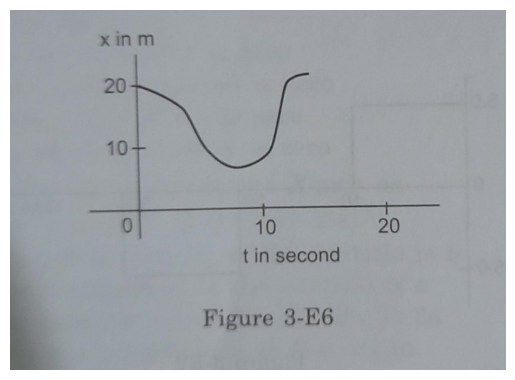


t in second


In [15]:
image_path_or_url = "https://datasets-server.huggingface.co/cached-assets/abhishekvidhate/PhysicsKinematisQA/--/06d7adbbf749be012e0e188ef7a44f7392bc6d18/--/default/test/0/image/image.jpg?Expires=1720279566&Signature=AgsKQ1toipI5vjn3ZTeBb1YJEiVqIVvF0VbkIEsjf52gR7p8frk6ijHDZt9eWY0gdGEkNzeGXt1Sqdjf2OY37AnugO1UPE64n2jSXA6IPs1GuFO7HiBBfyWOQjnwGgUHXFY1FYNQPDOziS8SdzQWNRQsN0sYIrxDi1xrq2roMSsadTZEPZXBkgbkmyOA1dTDAfSt-wuN-BzqQuZVdQut017BMA4maEfPSs0KcCpigpDI0QVfUezRUc6wIsU5kcf-oZbztLisPonGu1XURAPGs6FsnzVkvaFQyK5RLVafVbjpgIXgrM7GSowvO-g7TZJM2rN~gRu-O-kWrH3-XUAmOQ__&Key-Pair-Id=K3EI6M078Z3AC3"
raw_image = load_image(image_path_or_url)
prompt = "Figure (3-E6) shows x-t graph of a particle. Find the time t such that the average velocity of the particle during the period 0 to t is zero. Answer. use concepts of Kinematics(Physics of motion of objects) to get answer?"
raw_image = load_image(image_path_or_url)
plt.imshow(raw_image)
plt.axis('off')  # Turn off axis labels
plt.show()

inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])

# Q 10

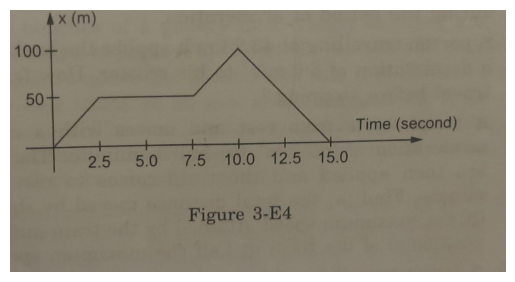


100 50 50 100 12.5 1


In [16]:
image_path_or_url = "https://datasets-server.huggingface.co/cached-assets/abhishekvidhate/PhysicsKinematisQA/--/06d7adbbf749be012e0e188ef7a44f7392bc6d18/--/default/test/1/image/image.jpg?Expires=1720279566&Signature=oJNf48EGDtqh3zkwp~F6drjX5VAIc933czCECuxfK8R-~~X-PzPJjyam83wuZ9PLezVgxBJ9~CbDXY02i5-hHhzWtbNUza2vHrb09NKyLqAk~lKZu1zn2TTzaFIdRgtZPscmPwe8tKuS-ELg6UKfpRAC6vvTyJ0Xi7l5A6-ynnYYLSbmQiBUtAbPdxi~8aOC8CXzxzkFza~pdxwqD2Rkb5CNcWUMzJpk~EFIeOZqevIWMOxRRbDBm3-35dzPI3CC~999QDwke3rKjBzZKpIGlWihUzNY6HnOWdi1bkIN0VlLgameejChQF-a0hZVcifykrb0T0oGAmqhSIJfNSvp8A__&Key-Pair-Id=K3EI6M078Z3AC3"
raw_image = load_image(image_path_or_url)
prompt = "Figure (3-E4) shows the graph of the x-coordinate of a particle going along the X-axis as a function of time. Find instantaneous velocity at 5 s?"
raw_image = load_image(image_path_or_url)
plt.imshow(raw_image)
plt.axis('off')  # Turn off axis labels
plt.show()

inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])

# Table comparing ground truth vs answer which my fine-tuned model generated

| Question | Ground Truth    | model's Generation | 
|----------|-----------------|--------------------|
| Q1       | Ground Truth 1  | 0 |
| Q2       | Ground Truth 2  | an old person moves on a semi-circular track of radius 40.0 m |
| Q3       | Ground Truth 3  | a ball is thrown from a field with a speed of 12.0 m/s |
| Q4       | Ground Truth 4  | 20 10 0 2 4 6 8 10 time in |
| Q5       | Ground Truth 5  | t |
| Q6       | Ground Truth 6  | no |
| Q7       | Ground Truth 7  | a particle moves in the xy plane with a constant acceleration of 1.5 m s² |
| Q8       | Ground Truth 8  | figure 3-Q1 |
| Q9       | Ground Truth 9  | t in second |
| Q10      | Ground Truth 10 | 100 50 50 100 12.5 1 |


| Question | Ground Truth    | FineTuned PaliGemma                                                 | Correct |
|----------|-----------------|----------------------------------------------------------------------|---------|
| Q1       | 50m  | 0                                                                    | No (generated in metres ,close to solution)     |
| Q2       | 80m  | an old person moves on a semi-circular track of radius 40.0 m        | No ( but close)      |
| Q3       | 14.4 m  | a ball is thrown from a field with a speed of 12.0 m/s               | No      |
| Q4       |80 m  | 20 10 0 2 4 6 8 10 time in                                           | No      |
| Q5       | constant velocity upto 't'  | t                                                                    | YES , correct     |
| Q6       | 9 m  | no                                                                   | No      |
| Q7       | (41.6 m, 7.2 m) at 4 seconds  | a particle moves in the xy plane with a constant acceleration of 1.5 m s² | No, generated Q , hallucinated      |
| Q8       | no answer  | figure 3-Q1                                                          | No      |
| Q9       |  12 seconds  | t in second                                                          | No, (generated in seconds, close)     |
| Q10      | 0 m/s | 100 50 50 100 12.5 1                                                 | No ( hallucinated answer)    |


### My scoring on this small dataset of 10 super hard Physics questions

- half point for close solution , full point for correct solution

- Fine-Tuned Pali Gemma-3B-pt-224 --> 

#### score = 2.5/10

# My assesment

I Trained/ finetuned model on very small dataset ( as memory resource were issue and also Google Colab don't have high memory for GPU to store alot of data at same time, so high training time.

If I had trained on large datasets, model will be more capable to understand and generate better, less hallucinations

# Comparing with Icefis2 model

I inferred Idefics2 model via ***Text Genearation Inference APIs*** provided by huggingface to compare it's performance on my custom dataset

## Idefics2 performance on my custom dataset 

built Streamlit App for ***API Inferencing***

### Idefics2 results : [benchmark results](https://github.com/Abhishekvidhate/FineTuned_PaliGemma/blob/master/benchmarking/Idefics2_results.md)

### my Assesment of Idefics2 

Idefics2 is trained on huge amount of ***Question-Answer (image-text-text) data***, and it provided detailed steps with explaination on how to solve questions

but Questions were too complex, ***Idefics2*** generated solutions which were close to real solutions, but ***after generating 500 tokens model started Hallucinating***, providing different text not related to problem.

#### this problem could be solved my increasing content length of ***Idefics2***, as model will be able to have more tokens to process at same time